In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [12]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

In [13]:
X.shape

(1000, 2)

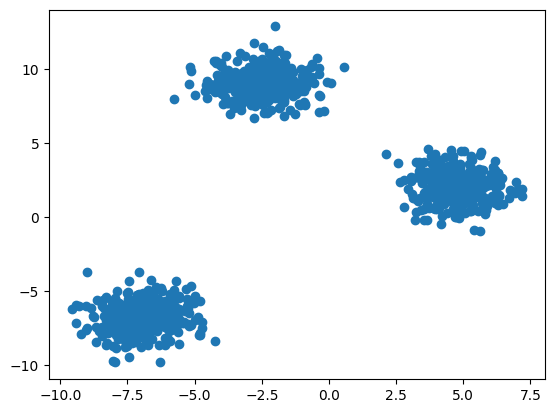

In [14]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [16]:
X_train, X_test = train_test_split(X, test_size=0.3,random_state=42)

### Manual Clustering

In [17]:
# elbow method to select k value

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[46568.38344977144,
 13218.48824537464,
 1402.9560472122448,
 1238.8203862262324,
 1067.7568614137103,
 987.3875411398195,
 823.6013028719672,
 728.8720586754973,
 633.216548897942,
 593.9999731859967]

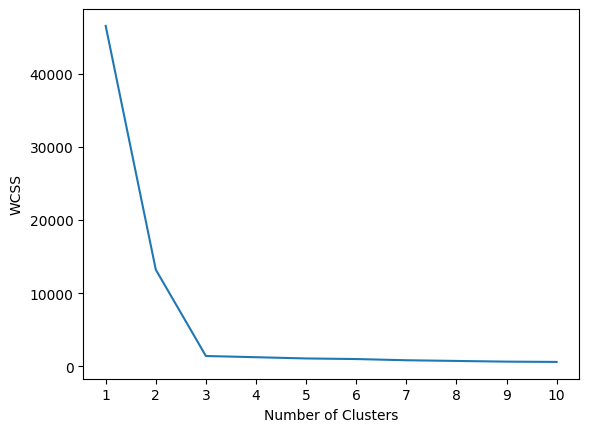

In [22]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans_model = KMeans(n_clusters=3, init='k-means++')

In [33]:
y_train_labels = kmeans_model.fit_predict(X_train)

In [34]:
y_test_labels = kmeans_model.predict(X_test)

### Plotting for traing data

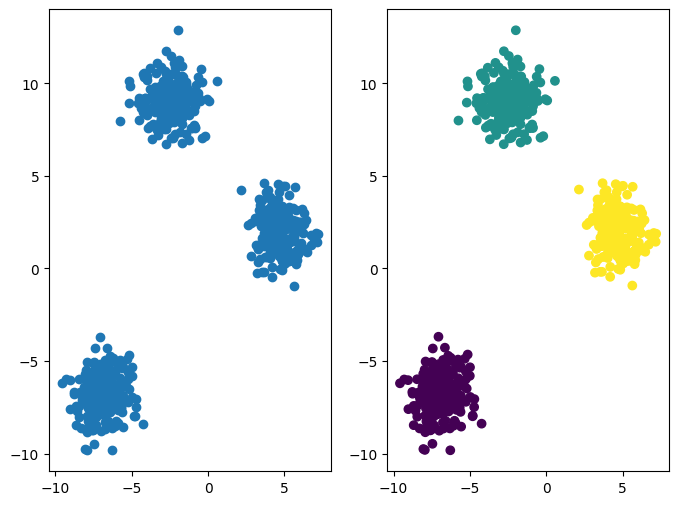

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

ax1.scatter(X_train[:, 0], X_train[:, 1])
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train_labels)
plt.show()

### PLotting for test data

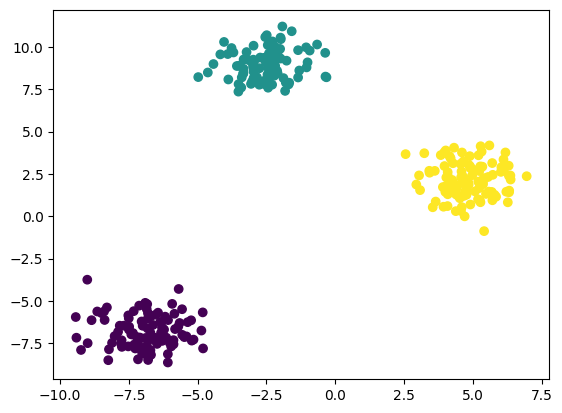

In [39]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_labels)
plt.show()

### Automatic Clustering

### Knee Locator

In [40]:
from kneed import KneeLocator

In [42]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [ ]:
print(kl.elbow) # 3 clusters

3


### Performance 
### silohouette score

In [45]:
from sklearn.metrics import silhouette_score

In [48]:
s_score = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    s_score.append(score)

In [51]:
s_score

[0.7034472678400877,
 0.8411019462735057,
 0.6793644038531517,
 0.4759904433628656,
 0.3310687031099783,
 0.47372845334328695,
 0.3269514498336872,
 0.32938431139781155,
 0.3315102068616123]

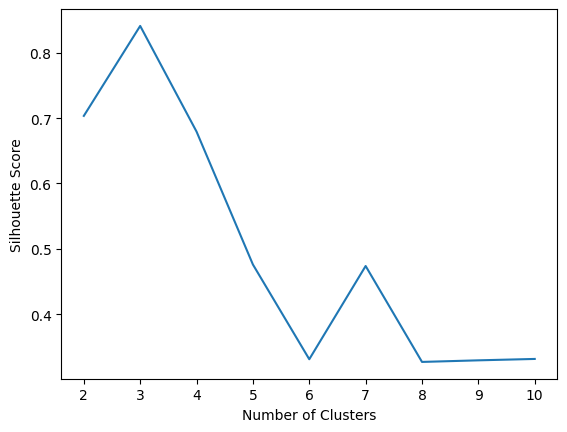

In [52]:
plt.plot(range(2,11), s_score)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [53]:
# k = 3 is best, more towars +1 more better clustering 